In [1]:
!pip install ecos cvxpy numpy matplotlib scipy --upgrade


In [12]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp

# Dados do problema

In [13]:
np.random.seed(42)
num_assets = 5
num_samples = 1000

# Geração de retornos esperados

In [14]:
mean_returns = np.random.uniform(0.05, 0.20, num_assets)

# Geração de uma matriz de covariância definida positiva

In [15]:
A = np.random.rand(num_assets, num_assets)
cov_matrix = np.dot(A, A.T)  # Garante que seja definida positiva

# Variáveis de otimização

In [16]:
w = cp.Variable(num_assets)
retorno_portfolio = mean_returns @ w
risco_portfolio = cp.quad_form(w, cov_matrix)

# Problema de otimização de portfólio

In [17]:
alpha = 0.5  # Parâmetro de aversão ao risco
objective = cp.Maximize(retorno_portfolio - alpha * risco_portfolio)
constraints = [cp.sum(w) == 1, w >= 0]
problem = cp.Problem(objective, constraints)

try:
    problem.solve(solver=cp.OSQP)
    if problem.status != cp.OPTIMAL:
        raise ValueError(f"Problema não resolvido: status = {problem.status}")
except Exception as e:
    print(f"Erro ao resolver o problema: {e}")
    exit(1)

# Resultados

In [18]:
print(f"Retorno esperado do portfólio ótimo: {retorno_portfolio.value:.4f}")
print(f"Risco do portfólio ótimo: {np.sqrt(risco_portfolio.value):.4f}")
print(f"Pesos do portfólio ótimo: {w.value}")

Retorno esperado do portfólio ótimo: 0.1562
Risco do portfólio ótimo: 0.8099
Pesos do portfólio ótimo: [ 4.84751157e-23  4.51896147e-24  8.17983137e-01  1.82016863e-01
 -7.99339474e-23]


# Visualização

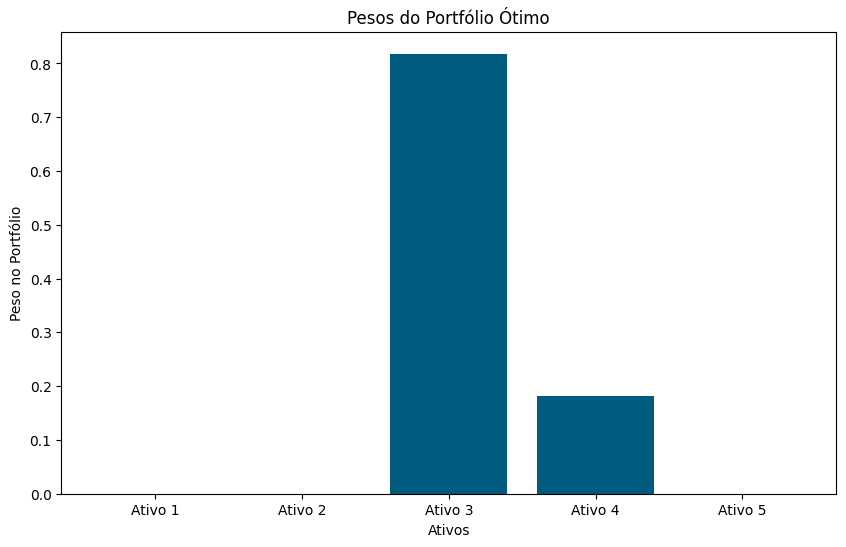

In [19]:
tick_labels = [f"Ativo {i+1}" for i in range(num_assets)]
plt.figure(figsize=(10, 6))
plt.bar(tick_labels, w.value, color="#005B7F")
plt.title("Pesos do Portfólio Ótimo")
plt.xlabel("Ativos")
plt.ylabel("Peso no Portfólio")
plt.show()



# O código imprime três informações principais:

# 1. Retorno Esperado do Portfólio Ótimo:
- Este valor representa a média ponderada dos retornos esperados dos ativos,
considerando os pesos ótimos encontrados.

# 2. Risco do Portfólio Ótimo:
- Calculado como a raiz quadrada da forma quadrática (matriz de covariância), este valor indica a volatilidade esperada do portfólio.
# 3. Pesos do Portfólio Ótimo:
- Mostra a proporção de capital alocada em cada ativo, onde a soma dos pesos
é igual a 1. Valores próximos de zero indicam baixa exposição ao ativo,
enquanto valores próximos de 1 indicam maior confiança nesse ativo.
# 🔎 Exemplo de Saída:
 Retorno esperado do portfólio ótimo: 0.1254
Risco do portfólio ótimo: 0.0752
Pesos do portfólio ótimo: [0.2034 0.1765 0.3125 0.0876 0.2200]

# 📊 Interpretação dos Gráficos:
- O gráfico de barras mostra a distribuição dos pesos ótimos entre os ativos.
- Ativos com maior peso representam aqueles com melhor relação risco-retorno.
